In [42]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

In [43]:
df=pd.read_excel("/content/ClaimDetailsnew.xlsx")
df

,ClaimNumber,LossDate,PolicyNumber,PolicyEntryDate,PolicyExpirationDate,ClaimLossDesc,ClaimStatus,Examiner,ClaimLOB,InsuredName,...,YearBuilt,Stories,Comments,ConstructionTypeDesc,FormattedAddress,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,2003862,2019-04-18 00:00:00.000,5010232,2019-05-03 08:09:04.880,2019-07-01 00:00:00.000,back up causing sewage water in from the drain...,Closed,rgibson,BOP Property,"ETHERIDGE OWNERS, INC.",...,1965,8,ClassCode:65146,MasonryNonCombustible,"3114 WISCONSIN AVENUE, NW\n\rWASHINGTON, DC 20016",20016,7626.78,4758237.0,30800,5090954
1,2004989,2020-01-01 00:00:00.000,7146314,2020-01-02 09:54:03.083,2020-05-04 00:00:00.000,Fire in the kitchen.,Closed,rgibson,BOP Property,"H W Owens, Inc",...,1969,2,ClassCode:65132,JoistedMasonry,"4000-4062 Tangle Drive\n\rRichmond, VA 23228",23228,17492.12,5042916.0,30480,2560320
2,2004989,2020-01-01 00:00:00.000,7146314,2020-01-02 09:54:03.083,2020-05-04 00:00:00.000,Fire in the kitchen.,Closed,rgibson,BOP Property,"H W Owens, Inc",...,1969,2,ClassCode:65132,JoistedMasonry,"4000-4062 Tangle Drive\n\rRichmond, VA 23228",23228,17492.12,5042916.0,30480,2560320
3,2005666,2020-04-30 00:00:00.000,7120072,2020-05-15 12:29:16.837,2020-10-10 00:00:00.000,Façade sign was torn from the building and han...,Closed,ahart,BOP Property,"RLGVS, LLC",...,2012,1,ClassCode:59999,MasonryNonCombustible,"1 NEWBERRY PARKWAY\n\rETTERS, PA 17319",17319,3009.98,3640000.0,35000,5426100
4,2006935,2021-01-27 00:00:00.000,7120072,2021-02-12 13:24:24.330,2021-10-10 00:00:00.000,Fire damage to the building,Closed,rgibson,BOP Property,"RLGVS, LLC",...,2012,1,ClassCode:59999,MasonryNonCombustible,"1 NEWBERRY PARKWAY\n\rETTERS, PA 17319",17319,48695.03,3640000.0,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2011122,2023-03-03 00:00:00.000,7228908,2023-09-26 08:18:36.867,2023-12-05 00:00:00.000,high wind and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1950,1,ClassCode:65146,Frame,"6480-6478 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,4617938.0,24440,3666000
203,2011122,2023-03-03 00:00:00.000,7228908,2023-09-26 08:18:36.867,2023-12-05 00:00:00.000,high wind and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1950,1,ClassCode:65146,Frame,"6480-6478 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,4617938.0,24440,3666000
204,2011123,2023-03-03 00:00:00.000,7228908,2023-09-26 08:26:02.633,2023-12-05 00:00:00.000,high winds and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1950,1,ClassCode:65146,Frame,"6458 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,2231296.8,11280,1692000
205,2011123,2023-03-03 00:00:00.000,7228908,2023-09-26 08:26:02.633,2023-12-05 00:00:00.000,high winds and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1950,1,ClassCode:65146,Frame,"6458 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,2231296.8,11280,1692000


In [44]:
selected_columns = ['LossDate', 'Jurisdiction', 'CoverageType', 'Deductible', 'Limit', 'InjuryCause',
                    'YearBuilt', 'Stories', 'Comments', 'ConstructionTypeDesc', 'ZipCode', 'LossAmount',
                    'E2Value', 'SquareFootage', 'BuildingLimit']

df = df[selected_columns]
df

,LossDate,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,Comments,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,2019-04-18 00:00:00.000,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,ClassCode:65146,MasonryNonCombustible,20016,7626.78,4758237.0,30800,5090954
1,2020-01-01 00:00:00.000,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,ClassCode:65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
2,2020-01-01 00:00:00.000,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,ClassCode:65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
3,2020-04-30 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,ClassCode:59999,MasonryNonCombustible,17319,3009.98,3640000.0,35000,5426100
4,2021-01-27 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,ClassCode:59999,MasonryNonCombustible,17319,48695.03,3640000.0,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2023-03-03 00:00:00.000,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 3666000.00,WIND,1950,1,ClassCode:65146,Frame,45247,NaN,4617938.0,24440,3666000
203,2023-03-03 00:00:00.000,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,ClassCode:65146,Frame,45247,NaN,4617938.0,24440,3666000
204,2023-03-03 00:00:00.000,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 1692000.00,WIND,1950,1,ClassCode:65146,Frame,45247,NaN,2231296.8,11280,1692000
205,2023-03-03 00:00:00.000,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,ClassCode:65146,Frame,45247,NaN,2231296.8,11280,1692000


In [45]:
df['Comments'] = df['Comments'].str.replace('ClassCode:', '')
df = df.rename(columns={'Comments': 'ClassCode'})
df

<ipython-input-45-09f633dda60d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comments'] = df['Comments'].str.replace('ClassCode:', '')


,LossDate,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,2019-04-18 00:00:00.000,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.0,30800,5090954
1,2020-01-01 00:00:00.000,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
2,2020-01-01 00:00:00.000,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
3,2020-04-30 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.0,35000,5426100
4,2021-01-27 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.0,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2023-03-03 00:00:00.000,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 3666000.00,WIND,1950,1,65146,Frame,45247,NaN,4617938.0,24440,3666000
203,2023-03-03 00:00:00.000,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,65146,Frame,45247,NaN,4617938.0,24440,3666000
204,2023-03-03 00:00:00.000,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 1692000.00,WIND,1950,1,65146,Frame,45247,NaN,2231296.8,11280,1692000
205,2023-03-03 00:00:00.000,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,65146,Frame,45247,NaN,2231296.8,11280,1692000


In [46]:
df["ZipCode"] = df["ZipCode"].str.replace("-", "")
df

,LossDate,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,2019-04-18 00:00:00.000,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.0,30800,5090954
1,2020-01-01 00:00:00.000,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
2,2020-01-01 00:00:00.000,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
3,2020-04-30 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.0,35000,5426100
4,2021-01-27 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.0,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2023-03-03 00:00:00.000,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 3666000.00,WIND,1950,1,65146,Frame,45247,NaN,4617938.0,24440,3666000
203,2023-03-03 00:00:00.000,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,65146,Frame,45247,NaN,4617938.0,24440,3666000
204,2023-03-03 00:00:00.000,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 1692000.00,WIND,1950,1,65146,Frame,45247,NaN,2231296.8,11280,1692000
205,2023-03-03 00:00:00.000,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,65146,Frame,45247,NaN,2231296.8,11280,1692000


In [47]:
df = df[pd.to_numeric(df['LossAmount'], errors='coerce').notna()]
df

,LossDate,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,2019-04-18 00:00:00.000,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.00,30800,5090954
1,2020-01-01 00:00:00.000,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320
2,2020-01-01 00:00:00.000,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320
3,2020-04-30 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.00,35000,5426100
4,2021-01-27 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.00,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,2023-07-31 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 362389.00,VEHICLES,1879,2,65141,Frame,44086,1710.00,339996.00,1954,362389
181,2023-08-15 00:00:00.000,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,76107.69,147168.00,1008,133125
182,2023-08-15 00:00:00.000,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,4269.09,147168.00,1008,133125
183,2023-08-16 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 701500.00,FIRE,1954,2,65144,Frame,19401,14320.07,474599.00,4040,610000


In [48]:
def extract_amount(value):
    match = re.search(r'(\d+\.\d+)', str(value))
    if match:
        return float(match.group(1))
    else:
        return None


In [49]:

df['LossAmount'] = df['LossAmount'].apply(extract_amount)
df = df.dropna(subset=['LossAmount'])
df


<ipython-input-49-5b722fd25d53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LossAmount'] = df['LossAmount'].apply(extract_amount)


,LossDate,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,2019-04-18 00:00:00.000,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.00,30800,5090954
1,2020-01-01 00:00:00.000,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320
2,2020-01-01 00:00:00.000,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320
3,2020-04-30 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.00,35000,5426100
4,2021-01-27 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.00,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,2023-07-31 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 362389.00,VEHICLES,1879,2,65141,Frame,44086,1710.00,339996.00,1954,362389
181,2023-08-15 00:00:00.000,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,76107.69,147168.00,1008,133125
182,2023-08-15 00:00:00.000,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,4269.09,147168.00,1008,133125
183,2023-08-16 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 701500.00,FIRE,1954,2,65144,Frame,19401,14320.07,474599.00,4040,610000


In [50]:
# in limit and deductible column, separate the alphabetical and numeric value in two separate columns



df['LossAmount'].fillna(0, inplace=True)
# df['Deductible'] = df['Deductible'].str.extract(r'(\d+\.\d+)').astype(float)
# df['Limit'] = df['Limit'].str.extract(r'(\d+\.\d+)').astype(float)
df['limit_type'] = df['Limit'].str.extract(r'([a-zA-Z]+)')
df['Limit_val'] = df['Limit'].str.extract(r'(\d+)')
df['Deductible_type'] = df['Deductible'].str.extract(r'([a-zA-Z]+)')
df['Deductible_val'] = df['Deductible'].str.extract(r'(\d+)')
df



,LossDate,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val
0,2019-04-18 00:00:00.000,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.00,30800,5090954,Standard,550637568,FixedDollar,2500
1,2020-01-01 00:00:00.000,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Standard,2560320,FixedDollar,5000
2,2020-01-01 00:00:00.000,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Blanket,1,FixedDollar,5000
3,2020-04-30 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.00,35000,5426100,Standard,704688296,FixedDollar,2500
4,2021-01-27 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.00,35000,5426100,Standard,732875728,FixedDollar,2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,2023-07-31 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 362389.00,VEHICLES,1879,2,65141,Frame,44086,1710.00,339996.00,1954,362389,Standard,362389,FixedDollar,1000
181,2023-08-15 00:00:00.000,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,76107.69,147168.00,1008,133125,Standard,133125,FixedDollar,1000
182,2023-08-15 00:00:00.000,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,4269.09,147168.00,1008,133125,Standard,133125,FixedDollar,1000
183,2023-08-16 00:00:00.000,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 701500.00,FIRE,1954,2,65144,Frame,19401,14320.07,474599.00,4040,610000,Standard,701500,FixedDollar,2500


In [51]:

df=df.drop(columns=["Limit", "Deductible", "LossDate"])
df



,Jurisdiction,CoverageType,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val
0,Dist. of Columbia,BOP-Building,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.00,30800,5090954,Standard,550637568,FixedDollar,2500
1,Virginia,BOP-Building,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Standard,2560320,FixedDollar,5000
2,Virginia,BOP-Building,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Blanket,1,FixedDollar,5000
3,Pennsylvania,BOP-Building,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.00,35000,5426100,Standard,704688296,FixedDollar,2500
4,Pennsylvania,BOP-Building,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.00,35000,5426100,Standard,732875728,FixedDollar,2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Pennsylvania,BOP-Building,VEHICLES,1879,2,65141,Frame,44086,1710.00,339996.00,1954,362389,Standard,362389,FixedDollar,1000
181,North Carolina,BOP-Building,WIND,1986,1,65141,Frame,27601,76107.69,147168.00,1008,133125,Standard,133125,FixedDollar,1000
182,North Carolina,BOP-Building,WIND,1986,1,65141,Frame,27601,4269.09,147168.00,1008,133125,Standard,133125,FixedDollar,1000
183,Pennsylvania,BOP-Building,FIRE,1954,2,65144,Frame,19401,14320.07,474599.00,4040,610000,Standard,701500,FixedDollar,2500


In [52]:
#convert the categorical column into numeric col
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
col_list = ["Jurisdiction", "CoverageType", "InjuryCause", "ClassCode", "ConstructionTypeDesc","ZipCode","limit_type","Deductible_type"]
for col in col_list:
    df[col]= label_encoder.fit_transform(df[col])
df



,Jurisdiction,CoverageType,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val
0,1,0,7,1965,8,13,2,59,7626.78,4758237.00,30800,5090954,1,550637568,0,2500
1,6,0,1,1969,2,7,1,65,17492.12,5042916.00,30480,2560320,1,2560320,0,5000
2,6,0,1,1969,2,7,1,65,17492.12,5042916.00,30480,2560320,0,1,0,5000
3,5,0,8,2012,1,4,2,34,3009.98,3640000.00,35000,5426100,1,704688296,0,2500
4,5,0,1,2012,1,4,2,34,48695.03,3640000.00,35000,5426100,1,732875728,0,2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5,0,6,1879,2,8,0,73,1710.00,339996.00,1954,362389,1,362389,0,1000
181,3,0,8,1986,1,8,0,66,76107.69,147168.00,1008,133125,1,133125,0,1000
182,3,0,8,1986,1,8,0,66,4269.09,147168.00,1008,133125,1,133125,0,1000
183,5,0,1,1954,2,10,0,53,14320.07,474599.00,4040,610000,1,701500,0,2500


In [53]:
columns_to_string = ['Jurisdiction', 'CoverageType', 'InjuryCause', 'ClassCode', 'ConstructionTypeDesc', 'ZipCode', 'limit_type',
                    'Deductible_type']
df[columns_to_string] = df[columns_to_string].astype(str)
columns_to_int = ['Stories', 'Deductible_val']
df.fillna(0, inplace=True)
df[columns_to_int] = df[columns_to_int].astype('int')
df['Limit_val'] = df['Limit_val'].astype('double')
#df['YearBuilt'] = df['YearBuilt'].astype('double')
df

,Jurisdiction,CoverageType,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val
0,1,0,7,1965,8,13,2,59,7626.78,4758237.00,30800,5090954,1,550637568.0,0,2500
1,6,0,1,1969,2,7,1,65,17492.12,5042916.00,30480,2560320,1,2560320.0,0,5000
2,6,0,1,1969,2,7,1,65,17492.12,5042916.00,30480,2560320,0,1.0,0,5000
3,5,0,8,2012,1,4,2,34,3009.98,3640000.00,35000,5426100,1,704688296.0,0,2500
4,5,0,1,2012,1,4,2,34,48695.03,3640000.00,35000,5426100,1,732875728.0,0,2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5,0,6,1879,2,8,0,73,1710.00,339996.00,1954,362389,1,362389.0,0,1000
181,3,0,8,1986,1,8,0,66,76107.69,147168.00,1008,133125,1,133125.0,0,1000
182,3,0,8,1986,1,8,0,66,4269.09,147168.00,1008,133125,1,133125.0,0,1000
183,5,0,1,1954,2,10,0,53,14320.07,474599.00,4040,610000,1,701500.0,0,2500


In [54]:
# df['YearGap'] = 	2023 - df['YearBuilt']
from datetime import datetime
df['YearGap'] = datetime.now().year - df['YearBuilt']
df

,Jurisdiction,CoverageType,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
0,1,0,7,1965,8,13,2,59,7626.78,4758237.00,30800,5090954,1,550637568.0,0,2500,58
1,6,0,1,1969,2,7,1,65,17492.12,5042916.00,30480,2560320,1,2560320.0,0,5000,54
2,6,0,1,1969,2,7,1,65,17492.12,5042916.00,30480,2560320,0,1.0,0,5000,54
3,5,0,8,2012,1,4,2,34,3009.98,3640000.00,35000,5426100,1,704688296.0,0,2500,11
4,5,0,1,2012,1,4,2,34,48695.03,3640000.00,35000,5426100,1,732875728.0,0,2500,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5,0,6,1879,2,8,0,73,1710.00,339996.00,1954,362389,1,362389.0,0,1000,144
181,3,0,8,1986,1,8,0,66,76107.69,147168.00,1008,133125,1,133125.0,0,1000,37
182,3,0,8,1986,1,8,0,66,4269.09,147168.00,1008,133125,1,133125.0,0,1000,37
183,5,0,1,1954,2,10,0,53,14320.07,474599.00,4040,610000,1,701500.0,0,2500,69


In [57]:
num_additional_rows = 190

additional_rows = df.sample(n=num_additional_rows, replace=True, random_state=42)

additional_rows.reset_index(drop=True, inplace=True)

df_extended = pd.concat([df, additional_rows], ignore_index=True)
print(f" {df_extended.shape}")

 (316, 17)


In [58]:
df_extended

,Jurisdiction,CoverageType,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
0,1,0,7,1965,8,13,2,59,7626.78,4758237.00,30800,5090954,1,550637568.0,0,2500,58
1,6,0,1,1969,2,7,1,65,17492.12,5042916.00,30480,2560320,1,2560320.0,0,5000,54
2,6,0,1,1969,2,7,1,65,17492.12,5042916.00,30480,2560320,0,1.0,0,5000,54
3,5,0,8,2012,1,4,2,34,3009.98,3640000.00,35000,5426100,1,704688296.0,0,2500,11
4,5,0,1,2012,1,4,2,34,48695.03,3640000.00,35000,5426100,1,732875728.0,0,2500,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,5,0,5,1960,2,8,1,6,3175.00,896231.52,4104,896231,1,896231.0,0,2500,63
312,5,0,7,1900,4,14,0,36,350.00,3895202.50,10000,1500000,1,1500000.0,0,2500,123
313,4,0,1,1966,1,4,1,76,4898.45,1038508.80,6720,930000,1,930000.0,0,2500,57
314,1,0,7,2022,3,16,0,61,2781.20,848000.00,4000,848000,1,848000.0,1,2500,1


In [ ]:
columns_to_convert = ['Jurisdiction', 'CoverageType', 'InjuryCause', 'ClassCode', 'ConstructionTypeDesc', 'ZipCode', 'limit_type', 'Deductible_type']

# Convert object columns to numeric
X_train[columns_to_convert] = X_train[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the updated data types
print(X_train.dtypes)

In [59]:
feature_data_types = df.dtypes
feature_data_types

Jurisdiction             object
CoverageType             object
InjuryCause              object
YearBuilt                 int64
Stories                   int64
ClassCode                object
ConstructionTypeDesc     object
ZipCode                  object
LossAmount              float64
E2Value                 float64
SquareFootage             int64
BuildingLimit             int64
limit_type               object
Limit_val               float64
Deductible_type          object
Deductible_val            int64
YearGap                   int64
dtype: object

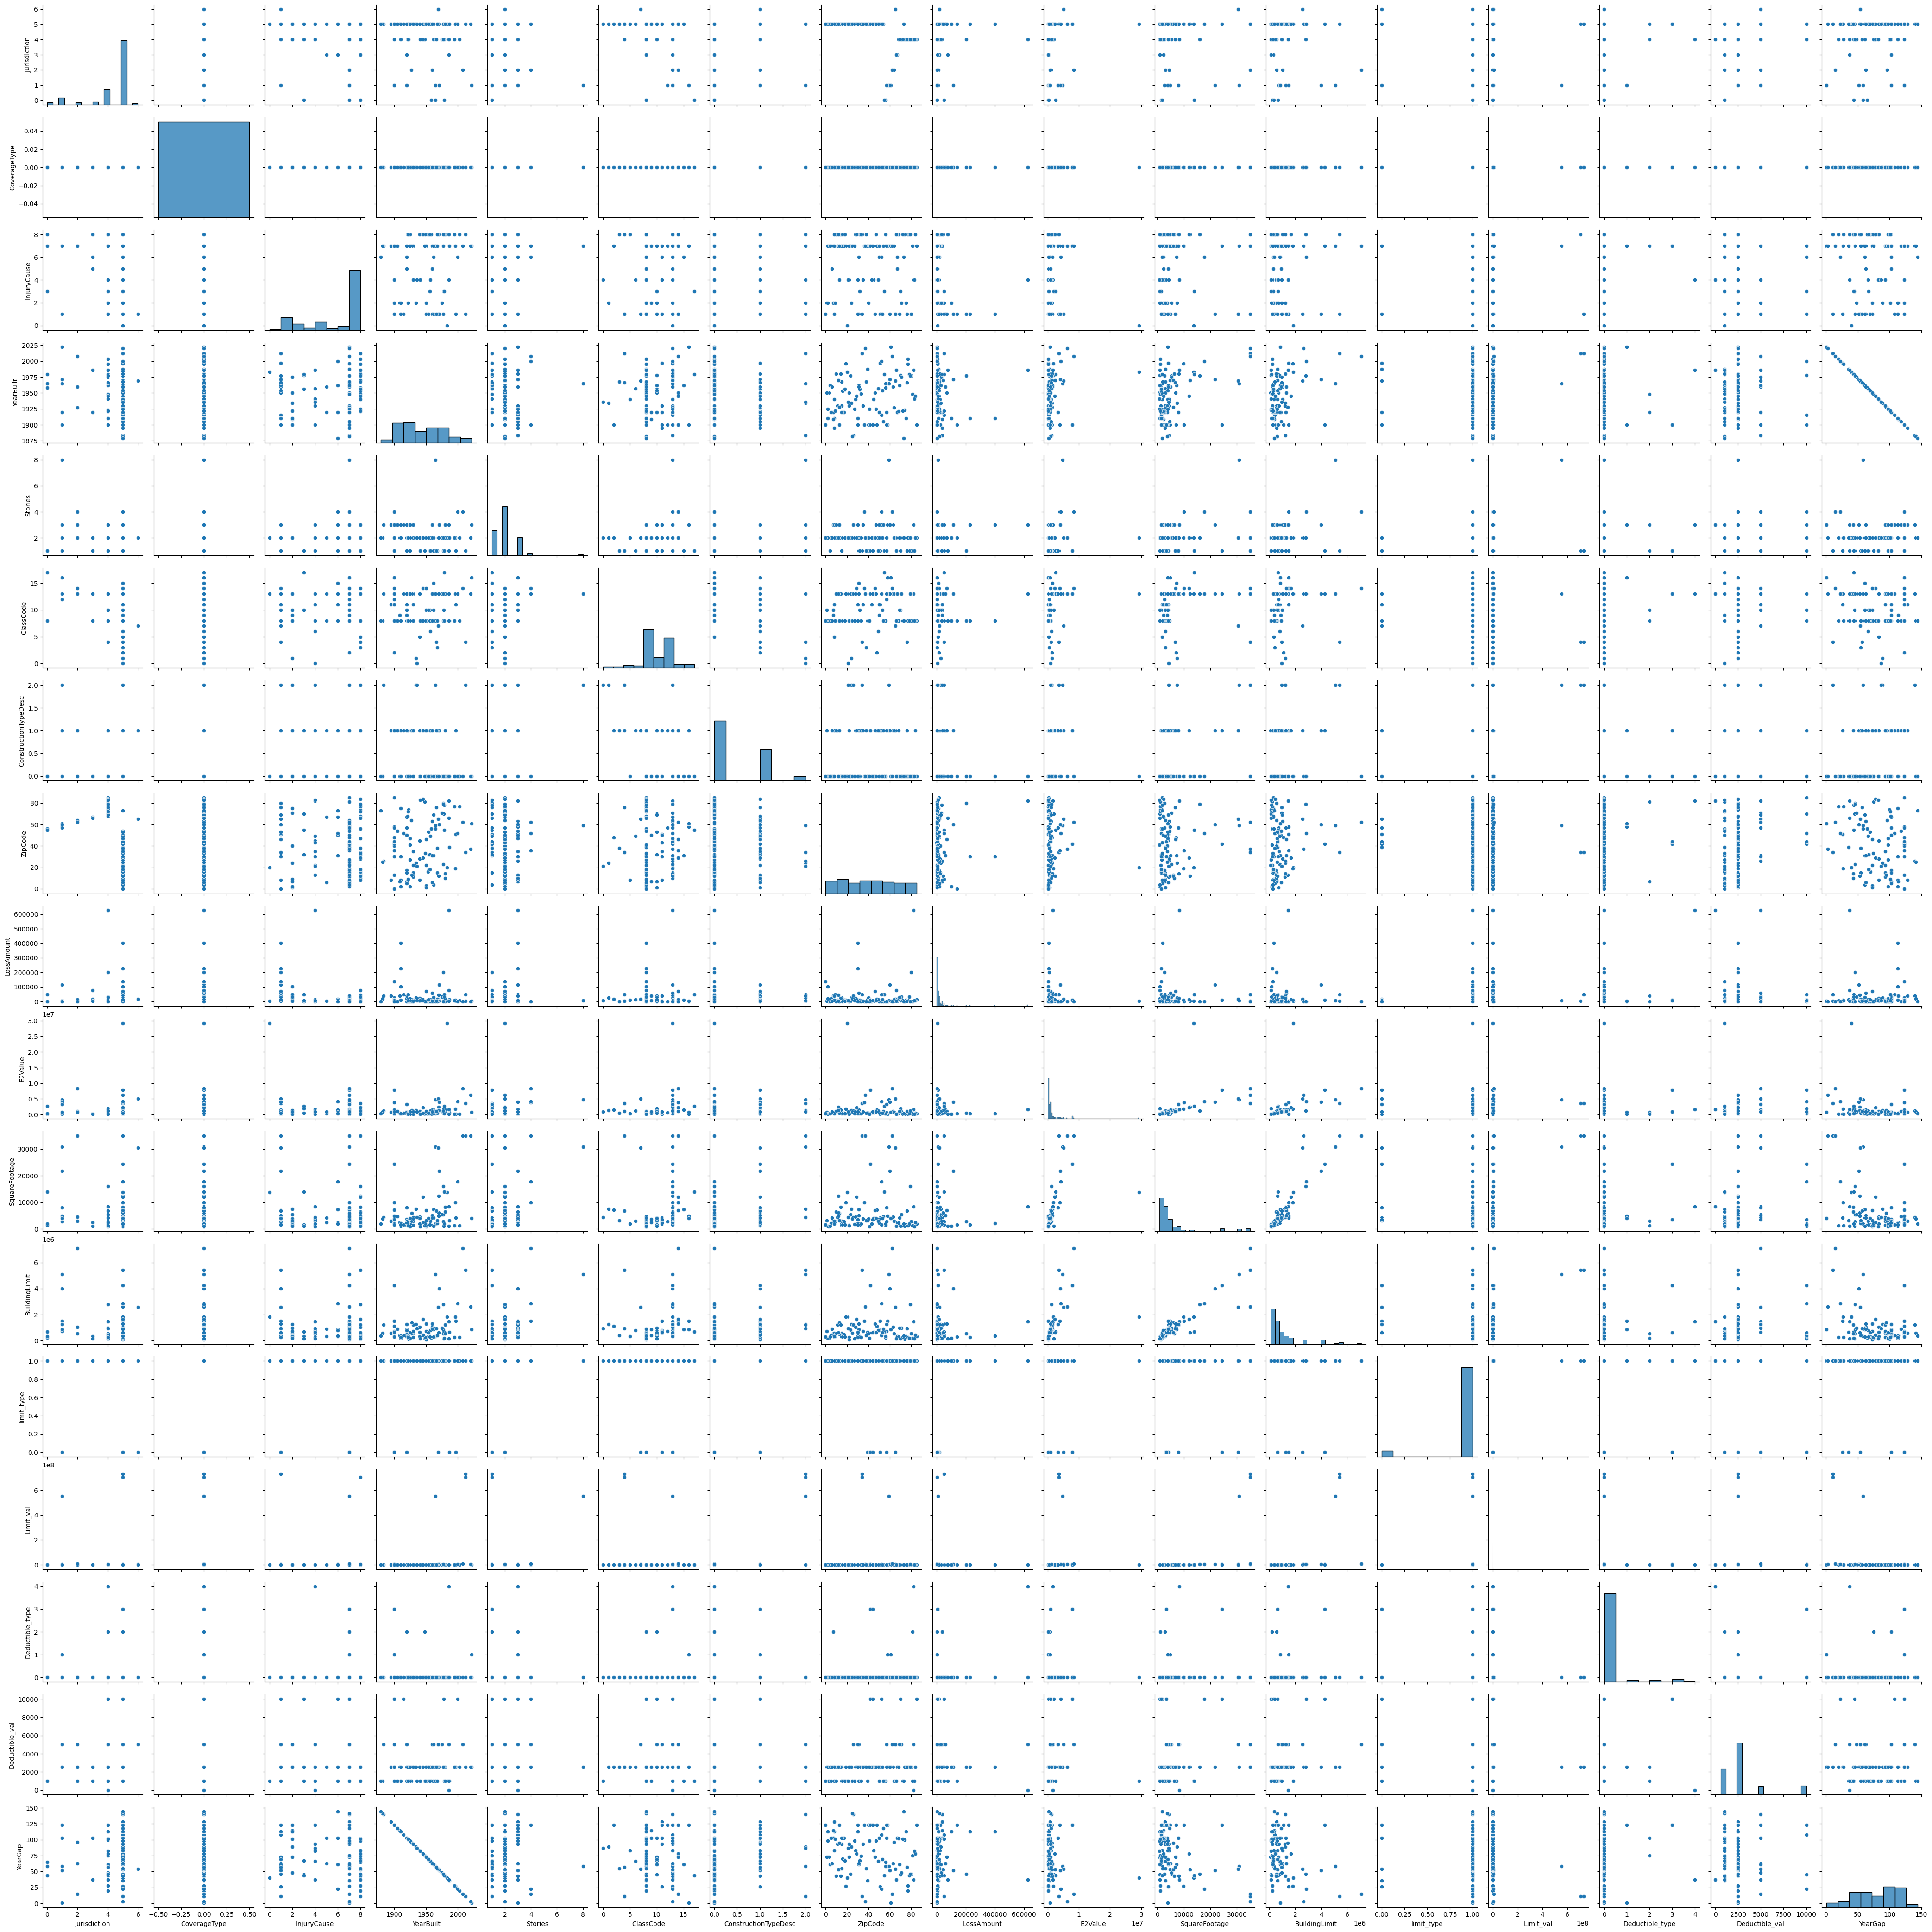

In [60]:
df_numeric = df.apply(pd.to_numeric, errors='ignore')
numerical_columns = df_numeric.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df_numeric[numerical_columns])
plt.show()

In [61]:
column_names = ["InjuryCause", "ConstructionTypeDesc", "ZipCode"]
value_counts_dict = {}

for column in column_names:
    value_counts_dict[column] = df[column].value_counts()

print(value_counts_dict)

{'InjuryCause': 7    51
8    28
1    17
4    11
2     8
6     5
3     3
5     2
0     1
Name: InjuryCause, dtype: int64, 'ConstructionTypeDesc': 0    79
1    41
2     6
Name: ConstructionTypeDesc, dtype: int64, 'ZipCode': 42    4
44    4
8     3
18    3
30    3
     ..
10    1
28    1
14    1
74    1
79    1
Name: ZipCode, Length: 86, dtype: int64}


<ipython-input-62-41af28bf9523>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.LossAmount)


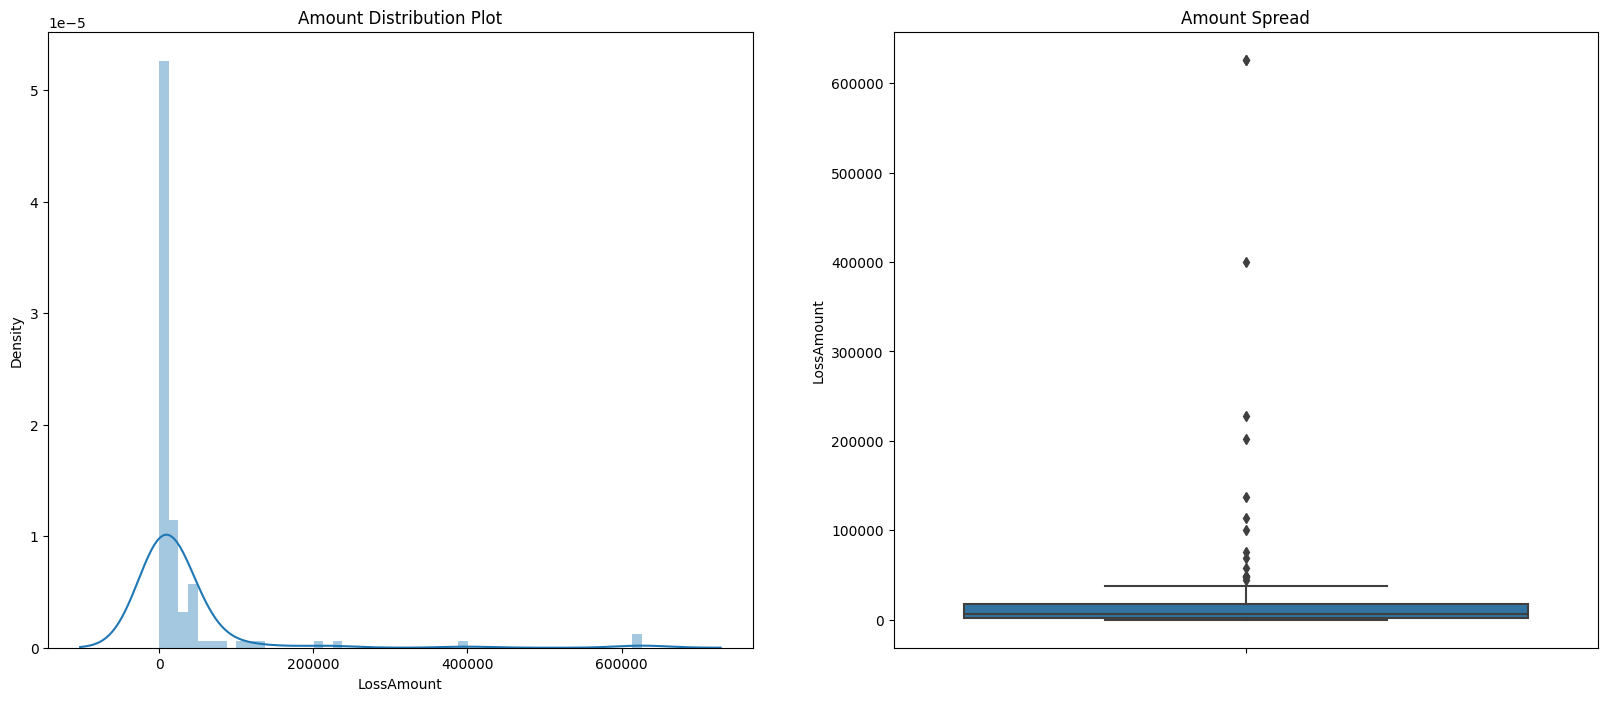

In [62]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Amount Distribution Plot')
sns.distplot(df.LossAmount)
plt.subplot(1,2,2)
plt.title('Amount Spread')
sns.boxplot(y=df.LossAmount)
plt.show()

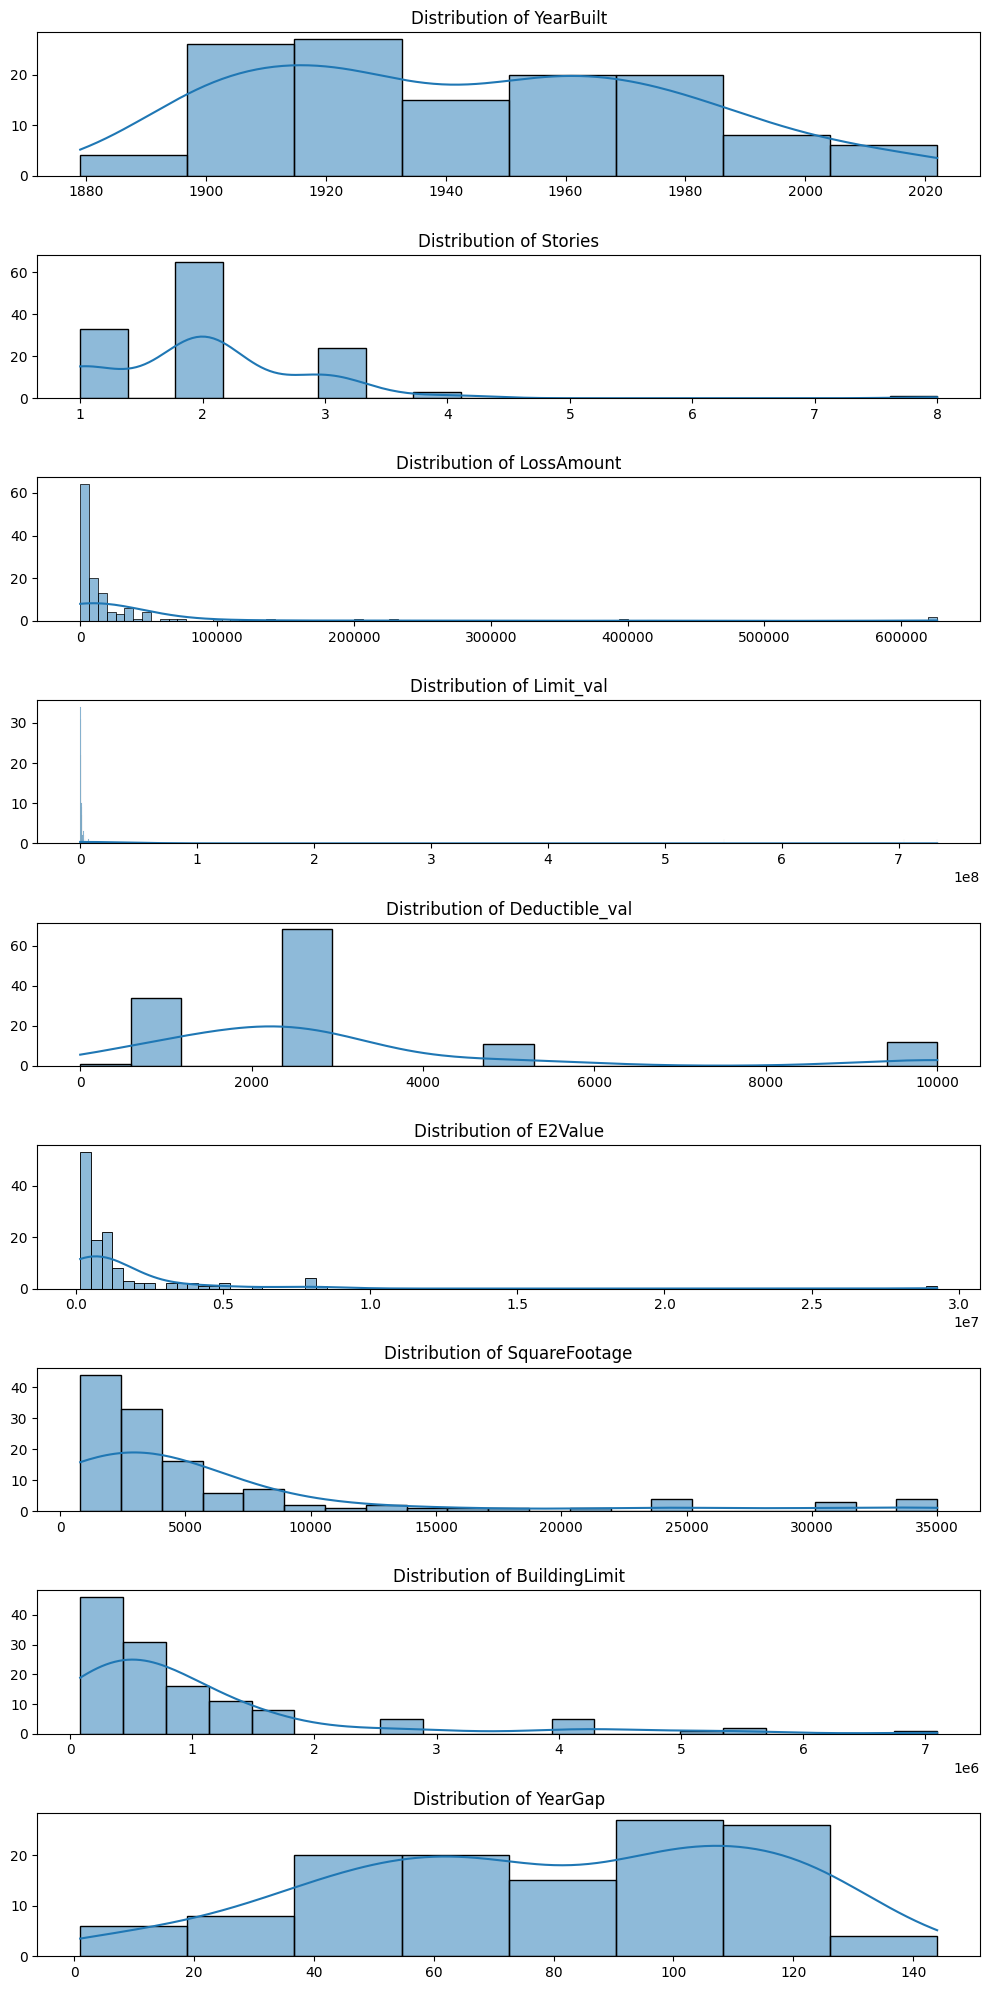

In [ ]:
numerical_columns = ['YearBuilt', 'Stories', 'LossAmount', 'Limit_val', 'Deductible_val','E2Value',	'SquareFootage',	'BuildingLimit',	'YearGap']
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 20))
for i, column in enumerate(numerical_columns):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
# Add spacing between subplots
plt.tight_layout()

plt.show()

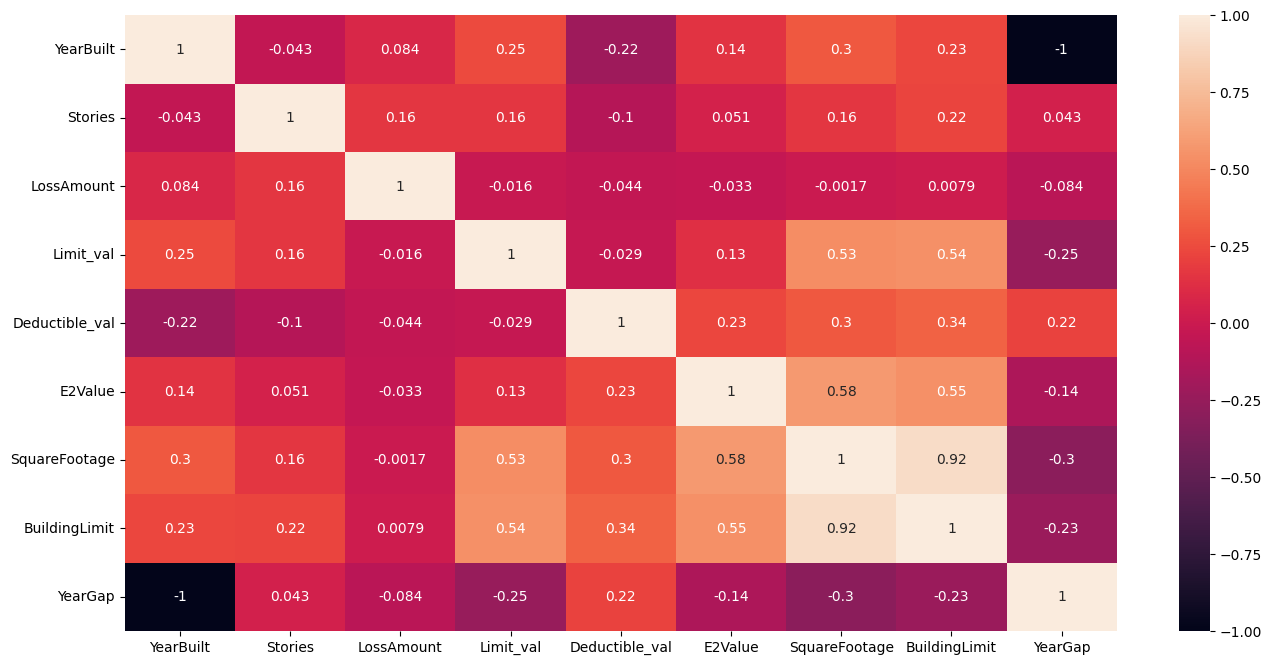

In [ ]:
corr_df = df[['YearBuilt', 'Stories', 'LossAmount', 'Limit_val', 'Deductible_val','E2Value',	'SquareFootage',	'BuildingLimit',	'YearGap']]
plt.figure(figsize=(16,8))
sns.heatmap(corr_df.corr(), annot=True)
plt.show()

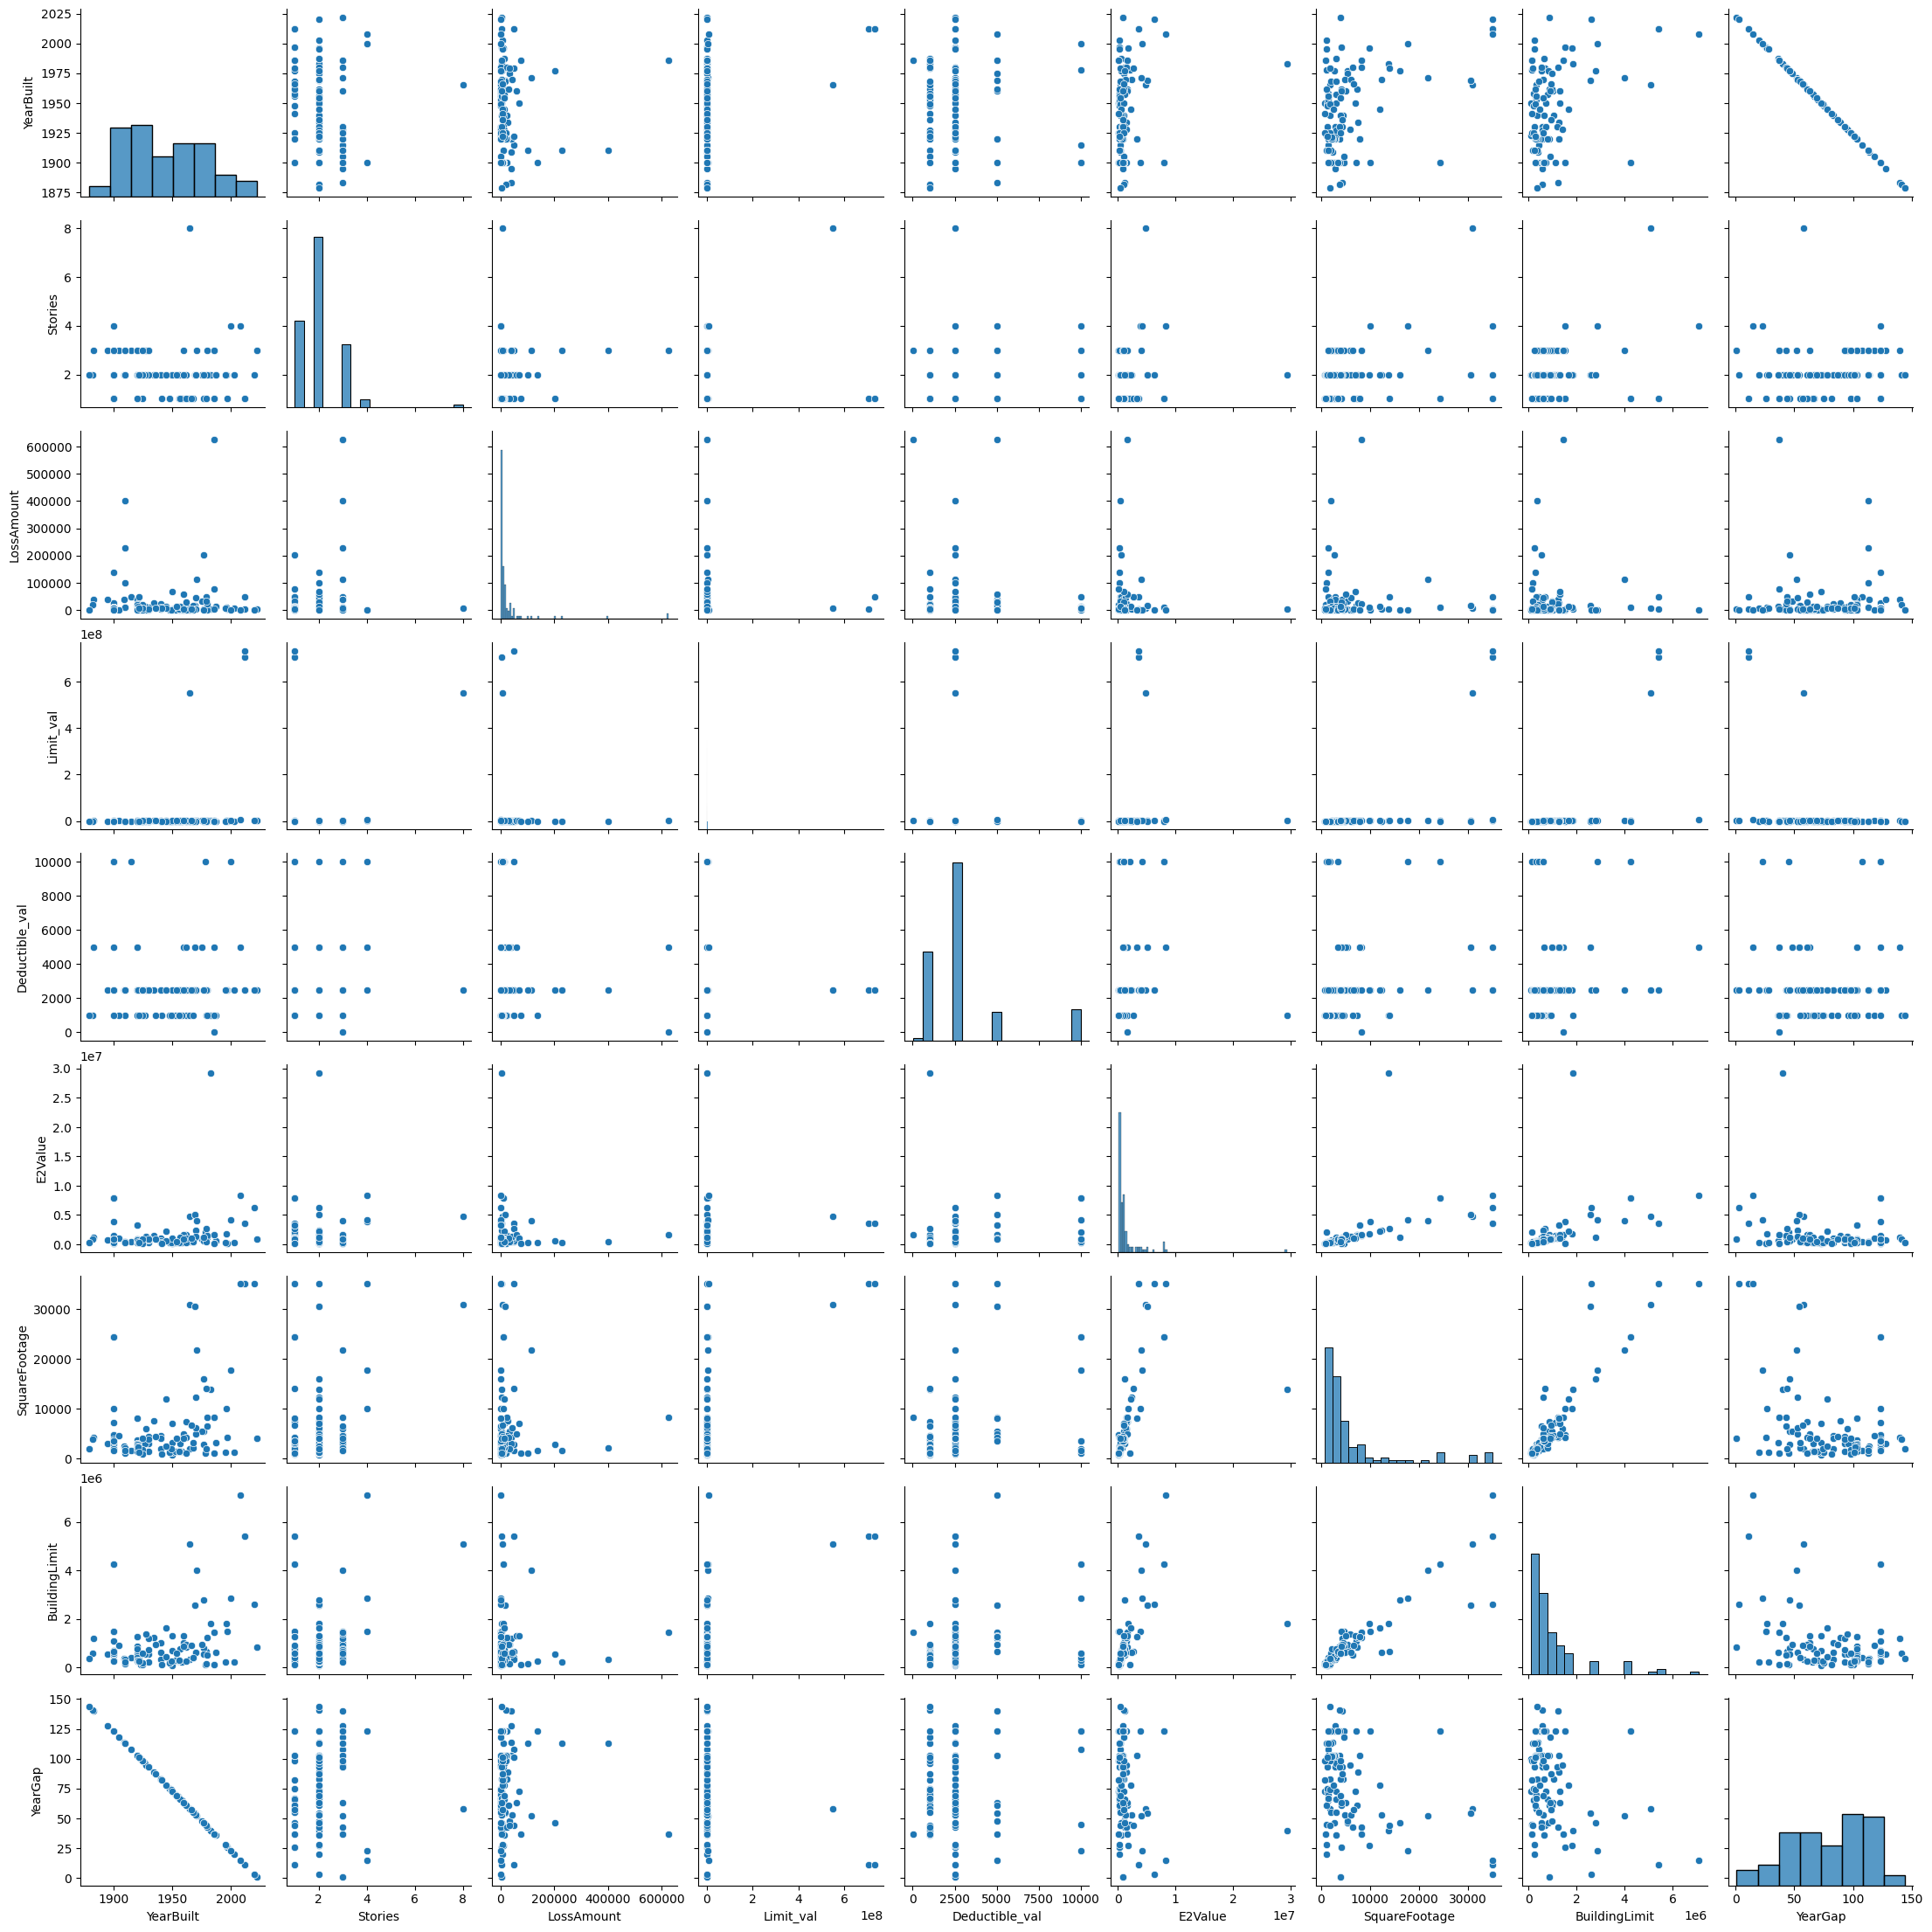

In [ ]:
sns.pairplot(df[numerical_columns])
plt.show()

**Data splitting -scaling**

In [63]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [64]:
X = df.drop(columns=["LossAmount"])
y = df["LossAmount"]

In [65]:
X

,Jurisdiction,CoverageType,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
0,1,0,7,1965,8,13,2,59,4758237.00,30800,5090954,1,550637568.0,0,2500,58
1,6,0,1,1969,2,7,1,65,5042916.00,30480,2560320,1,2560320.0,0,5000,54
2,6,0,1,1969,2,7,1,65,5042916.00,30480,2560320,0,1.0,0,5000,54
3,5,0,8,2012,1,4,2,34,3640000.00,35000,5426100,1,704688296.0,0,2500,11
4,5,0,1,2012,1,4,2,34,3640000.00,35000,5426100,1,732875728.0,0,2500,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5,0,6,1879,2,8,0,73,339996.00,1954,362389,1,362389.0,0,1000,144
181,3,0,8,1986,1,8,0,66,147168.00,1008,133125,1,133125.0,0,1000,37
182,3,0,8,1986,1,8,0,66,147168.00,1008,133125,1,133125.0,0,1000,37
183,5,0,1,1954,2,10,0,53,474599.00,4040,610000,1,701500.0,0,2500,69


In [66]:
y

0       7626.78
1      17492.12
2      17492.12
3       3009.98
4      48695.03
         ...   
172     1710.00
181    76107.69
182     4269.09
183    14320.07
190     1250.00
Name: LossAmount, Length: 126, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [70]:
X_train

,Jurisdiction,CoverageType,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
92,4,0,8,1923,2,8,0,74,218400.00,1120,109200,1,109200.0,0,2500,100
13,5,0,0,1983,2,13,0,20,29266185.60,13800,1831631,1,1831631.0,0,1000,40
156,5,0,7,1900,1,13,0,44,955986.00,3489,610526,0,1.0,0,10000,123
183,5,0,1,1954,2,10,0,53,474599.00,4040,610000,1,701500.0,0,2500,69
38,5,0,1,1997,1,11,1,51,202400.00,4176,1500000,1,1500000.0,0,2500,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,5,0,7,1900,1,13,1,42,7937675.85,24353,4261720,0,1.0,0,10000,123
15,5,0,3,1956,1,10,1,32,406800.00,1620,305000,1,305000.0,0,2500,67
118,5,0,8,1949,2,8,1,33,355200.00,1920,265187,1,265187.0,0,1000,74
66,5,0,7,1920,2,8,0,17,491680.00,2800,480564,1,480564.0,0,1000,103


In [108]:
columns_to_convert = ['Jurisdiction', 'CoverageType', 'InjuryCause', 'ClassCode', 'ConstructionTypeDesc', 'ZipCode', 'limit_type', 'Deductible_type']

# Convert object columns to numeric
X_train[columns_to_convert] = X_train[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the updated data types
print(X_train.dtypes)


Jurisdiction              int64
CoverageType              int64
InjuryCause               int64
YearBuilt                 int64
Stories                   int64
ClassCode                 int64
ConstructionTypeDesc      int64
ZipCode                   int64
E2Value                 float64
SquareFootage             int64
BuildingLimit             int64
limit_type                int64
Limit_val               float64
Deductible_type           int64
Deductible_val            int64
YearGap                   int64
dtype: object


In [109]:
columns_to_convert = ['Jurisdiction', 'CoverageType', 'InjuryCause', 'ClassCode', 'ConstructionTypeDesc', 'ZipCode', 'limit_type', 'Deductible_type']

# Convert object columns to numeric
X_test[columns_to_convert] = X_test[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the updated data types
print(X_test.dtypes)

Jurisdiction              int64
CoverageType              int64
InjuryCause               int64
YearBuilt                 int64
Stories                   int64
ClassCode                 int64
ConstructionTypeDesc      int64
ZipCode                   int64
E2Value                 float64
SquareFootage             int64
BuildingLimit             int64
limit_type                int64
Limit_val               float64
Deductible_type           int64
Deductible_val            int64
YearGap                   int64
dtype: object


In [110]:
column_data_types =y_train.dtypes
column_data_types

dtype('float64')

In [111]:
column_data_types =y_test.dtypes
column_data_types

dtype('float64')

In [103]:
columns_to_convert = ['Jurisdiction', 'CoverageType', 'InjuryCause', 'ClassCode', 'ConstructionTypeDesc', 'ZipCode', 'limit_type', 'Deductible_type']

# Convert object columns to numeric
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the updated data types
print(df.dtypes)

Jurisdiction              int64
CoverageType              int64
InjuryCause               int64
YearBuilt                 int64
Stories                   int64
ClassCode                 int64
ConstructionTypeDesc      int64
ZipCode                   int64
LossAmount              float64
E2Value                 float64
SquareFootage             int64
BuildingLimit             int64
limit_type                int64
Limit_val               float64
Deductible_type           int64
Deductible_val            int64
YearGap                   int64
dtype: object
Jurisdiction              int64
CoverageType              int64
InjuryCause               int64
YearBuilt                 int64
Stories                   int64
ClassCode                 int64
ConstructionTypeDesc      int64
ZipCode                   int64
LossAmount              float64
E2Value                 float64
SquareFootage             int64
BuildingLimit             int64
limit_type                int64
Limit_val               fl

In [ ]:
X1 = df_extended.drop(columns=["LossAmount"])
y1 = df_extended["LossAmount"]

In [74]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
columns_to_convert = ['Jurisdiction', 'CoverageType', 'InjuryCause', 'ClassCode', 'ConstructionTypeDesc', 'ZipCode', 'limit_type', 'Deductible_type']

# Convert object columns to numeric
X1_train[columns_to_convert] = X1_train[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the updated data types
print(X1_train.dtypes)

**Linear Regrassion**

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

109328.47857754849

In [78]:
R2= r2_score(y_test, y_pred)
R2

0.15908492648546935

In [79]:
model = LinearRegression()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
rmse

113261.89105779993

In [83]:
R2= r2_score(y1_test, y1_pred)
R2

0.12339848468023329

**Catboost**

In [84]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00


In [85]:
from catboost import CatBoostRegressor

In [86]:
cbr = CatBoostRegressor(iterations=100,
                        depth=5,
                        learning_rate=0.01,
                        loss_function='RMSE',
                        verbose=0)
cbr.fit(X_train, y_train)
y_pred = cbr.predict(X_test)
y_pred

array([ 28809.26550618,  22811.58640895,  20296.7316888 ,  20561.07297156,
        21793.65484526,  25398.9377126 ,  34004.45093487,  21725.8952796 ,
        22051.13162853,  20317.3225835 ,  25779.12461476,  36851.13751024,
        36211.67786971,  21111.02053511,  25357.05288858,  22447.86733054,
        27516.54741125,  21760.67962263,  48874.40897835,  21703.12096923,
        25036.57062352,  21345.99032779, 120333.22664872,  22336.94456015,
        29474.93512827,  21245.99888671])

In [87]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

101395.68130910724

In [89]:
R2=r2_score(y_test, y_pred)
R2

0.2766900425891846

df_extended

In [90]:
cbr = CatBoostRegressor(iterations=100,
                        depth=5,
                        learning_rate=0.01,
                        loss_function='RMSE',
                        verbose=0)
cbr.fit(X1_train, y1_train)
y1_pred = cbr.predict(X1_test)
y1_pred

array([ 15174.64450597,  40278.78597032,  15822.37685696,  16407.73969322,
        27897.500711  ,  16637.51665195,  15891.91090884,  14571.33464897,
        59270.16400573,  15818.33162359,  14812.7366133 ,  16381.16894228,
        15002.74239552,  15350.52743984,  16636.60965154,  15833.68605613,
        58052.40121866,  18315.90012921,  59270.16400573,  16567.37054964,
        15833.68605613, 153977.73636979,  18275.98197797,  24088.94729793,
        27147.35031224,  16125.53236385,  15626.26678508,  16407.73969322,
       127476.78495953,  16703.09127516,  16125.53236385,  26371.50699442,
        34547.63395769,  26371.50699442,  16381.16894228,  15940.0187623 ,
        21710.34136118,  16434.98444686,  15338.04298639,  15157.55912643,
        16434.98444686,  25562.24735829,  15697.37671364,  16407.73969322,
        17210.43962106,  17104.56149624,  16455.87721753,  23018.23734242,
       116673.25483885,  25314.87321031,  15301.96355596,  20358.20481518,
        29100.03550757,  

In [91]:
mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
rmse

98399.14767711963

In [92]:
R2=r2_score(y1_test, y1_pred)
R2

0.33836682455661826

**XGBoost**

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

In [112]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
y_pred = xgr.predict(X_test)
y_pred

array([1.8227709e+04, 8.2355557e+03, 6.8589624e+03, 5.0565776e+03,
       5.2033685e+02, 1.4150596e+04, 3.1197237e+01, 3.0111598e+04,
       1.0899176e+04, 8.4410527e+03, 5.2738657e+03, 6.2467856e+05,
       5.6605887e+04, 1.2957467e+04, 1.4251881e+04, 8.1068491e+03,
       1.8238516e+04, 5.1393340e+03, 8.1228477e+04, 3.6647483e+03,
       3.8168020e+04, 2.7813525e+03, 6.2599462e+05, 2.7992073e+03,
       7.9091938e+04, 1.3826490e+04], dtype=float32)

In [113]:
R2=r2_score(y_test, y_pred)
R2

-0.07791992954005478

**Random Forest**

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred

array([  8042.37715   ,   8981.128725  ,   7264.7623    ,  23426.65      ,
         9238.32813333,   9325.08108333,  16169.567575  ,  24586.6482    ,
         4945.308     ,   7184.39415   ,  39244.5475    , 168450.5964    ,
        70863.1135    ,   8915.59755   ,   9942.53895833,   8312.097125  ,
         5500.28215   ,   6970.567825  ,  37114.7451    ,   6138.83409167,
        29763.86195   ,   4640.1457    , 397583.7185    ,   5399.4222    ,
        57710.5552    ,  14382.140875  ])

In [98]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

57295.80504365254

In [99]:
R2=r2_score(y_test, y_pred)
R2

0.7690429731076571

In [100]:
mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
rmse

98399.14767711963

In [101]:
R2=r2_score(y1_test, y1_pred)
R2

0.33836682455661826